In [84]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Ángel Jaramillo Valencia
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [85]:
tiempo = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
corriente = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
L = 0.98
R = 0.142
h = 0.01 #El paso de t siempre es 0.01
df = pd.DataFrame(zip(tiempo, corriente), columns = ['Tiempo', 'Corriente'])
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [86]:
derivada_cen = np.array([(corriente[i+1] - corriente[i-1])/ (2 * 0.01) for i in range(1, len(corriente) -1)])
derivada_ad = np.array([(corriente[i+1] - corriente[i])/ (0.01) for i in range(len(corriente) -1)])

derivada_ad = np.array([derivada_ad[0], derivada_ad[-1]])
diff_fin = np.concatenate([derivada_cen, derivada_ad])
diff_fin.sort()
diff_fin

array([2., 2., 3., 5., 6.])

In [87]:
derivada_df = np.gradient(corriente, tiempo)
derivada_df

array([2., 2., 3., 5., 6.])

In [88]:
derivada_3pa = np.array([(-3 * corriente[i] + 4 * corriente[i+1] - corriente[i+2]) / (2 *h) for i in range(len(corriente)-2)])
derivada_3pat = np.array([(3 * corriente[i] - 4 * corriente[i-1] + corriente[i-2]) / (2 *h) for i in range(2,len(corriente))])
derivada_3pc = np.array([(corriente[i+1] - corriente[i-1]) / (2 *h) for i in range(1,len(corriente)-1)])

derivada_3p = np.array([derivada_3pa[0], derivada_3pat[-1]])
derivada_3pt = np.concatenate([derivada_3p, derivada_3pc])
derivada_3pt.sort()
derivada_3pt

array([2., 2., 3., 5., 7.])

In [89]:
from scipy.interpolate import BarycentricInterpolator # Interpolación Newton

In [90]:
P = BarycentricInterpolator(tiempo, corriente)
dt = P.derivative(tiempo)
dt

array([3.16666667, 1.5       , 2.83333333, 5.16666667, 6.5       ])

Los resultados obtenidos mediante el polinomio de Newton discrepan más de lo esperado con las derivadas obtenidas usando los métodos anteriores.

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

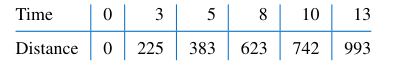



In [147]:
tiempo1 = np.array([0, 3, 5, 8, 10, 13])
distancia = np.array([0, 225, 383, 623, 742, 993])

vel_cen = np.array([(distancia[j+1] - distancia[j-1])/ (2 * (tiempo1[1] - tiempo1[0])) for j in range(1, len(distancia)-1)])
vel_ad = np.array([(distancia[i+1] - distancia[i])/ (tiempo1[1] - tiempo1[0]) for i in range(len(distancia) -2)])
vel_at = np.array([(distancia[i] - distancia[i-1])/ (tiempo1[1] - tiempo1[0]) for i in range(1, len(distancia))])

vel_ins = np.concatenate([[vel_ad[0]], vel_cen, [vel_at[-1]]])

print(f'las velocidades instantáneas para los tiempos y distancias mostrados son: {vel_ins} m/s')

las velocidades instantáneas para los tiempos y distancias mostrados son: [75.         63.83333333 66.33333333 59.83333333 61.66666667 83.66666667] m/s


In [148]:
velocidad = np.gradient(distancia, tiempo1)

In [149]:
velocidad, vel_ins

(array([75.        , 77.4       , 79.4       , 67.7       , 69.16666667,
        83.66666667]),
 array([75.        , 63.83333333, 66.33333333, 59.83333333, 61.66666667,
        83.66666667]))

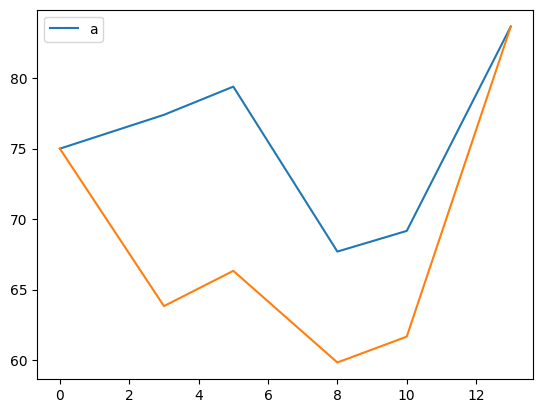

In [150]:
plt.plot(tiempo1, velocidad, label = 'a')
plt.plot(tiempo1, vel_ins)
plt.legend()

In [153]:
P1 = BarycentricInterpolator(tiempo1, velocidad)
print(f'la velocidad en t = 12 es: {P1(12)} m/s')

la velocidad en t = 12 es: 81.55799999999996 m/s


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

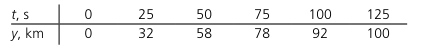

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [94]:
tiempo2 = np.array([0, 25, 50, 75, 100, 125])
distancia2 = np.array([0, 32, 58, 78, 92, 100]) * 1000 #Para que las unidades de velocidad queden en m / s

vel_cen_c = np.array([(distancia2[i+1] - distancia2[i-1])/ ((tiempo2[i+1] - tiempo2[i-1])) for i in range(1, len(tiempo2) - 1)])
vel_ad_c = np.array([(distancia2[i+1] - distancia2[i])/ (tiempo2[i+1] - tiempo2[i]) for i in range(len(distancia2) -2)])
vel_at_c = np.array([(distancia2[i] - distancia2[i-1])/ (tiempo2[i] - tiempo2[i-1]) for i in range(1, len(distancia2))])

vel_ins_c = np.concatenate([[vel_ad_c[0]], vel_cen_c, [vel_at_c[-1]]])

print(f'las velocidades del cohete en cada momento son: {vel_ins_c} m / s')

las velocidades del cohete en cada momento son: [1280. 1160.  920.  680.  440.  320.] m / s


In [157]:
l = np.gradient(distancia2, tiempo2)
vel_cen_c = np.array([(distancia2[i+1] - distancia2[i-1])/ ((tiempo2[i+1] - tiempo2[i-1])) for i in range(1, len(tiempo2) - 1)])
vel_cen_c1 = np.array([(distancia2[i+1] - distancia2[i-1])/ (2 * (tiempo2[1] - tiempo2[0])) for i in range(1, len(tiempo2) - 1)])

l, vel_cen_c, vel_cen_c1


(array([1280., 1160.,  920.,  680.,  440.,  320.]),
 array([1160.,  920.,  680.,  440.]),
 array([1160.,  920.,  680.,  440.]))

In [95]:
print(f'las aceleraciones del cohete en cada momento son: {np.gradient(vel_ins_c, tiempo2)} m / s^2')

las aceleraciones del cohete en cada momento son: [-4.8 -7.2 -9.6 -9.6 -7.2 -4.8] m / s^2


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [96]:
z = sp.symbols('z')
R = 1e-4
V = 1 /sp.sqrt(z ** 2 + (R)**2)
V_= sp.lambdify(z, V)
E = - sp.diff(V,z)

E

z/(z**2 + 1.0e-8)**(3/2)

In [97]:
e = sp.lambdify(z, E)
e(1)

0.9999999850000003

In [98]:
z_val = np.linspace(R, 1e-5, 1000)

E1 = - np.gradient(V_(z_val), z_val)

E1[1]

35371250.49807739

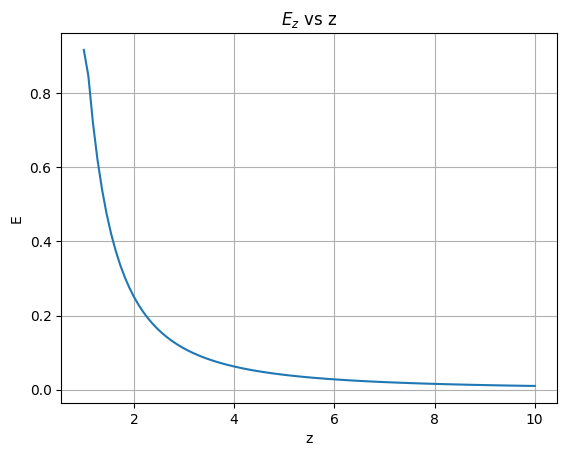

In [99]:
z_ = np.linspace(1, 10, 100)
E2 = -np.gradient(V_(z_), z_)

plt.plot(z_, E2)
plt.title('$E_z$ vs z')
plt.xlabel('z')
plt.ylabel('E')
plt.grid()
plt.show()